# Medical Cost Personal Insurance Project

The main purpose of the Medical Cost Personal Insurance Project is to analyze the Medical Cost Personal Dataset and predict the medical cost of people by their age, sex, BMI, children, smoker and region data.

In [12]:
# Import necessary libraries.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read the data file.
data = pd.read_csv("Medical_Cost_Personal_Insurance_Project.csv")

Here we downloaded the entire dataset on my local computer from https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv and then imported to jupiter notebook

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset includes 1338 rows x 7 columns. The columns are the features related to each person

**Features in the Medical Cost Personal Dataset:**


* Age: The age of the person
* Sex: The gender of the person
* BMI: The body mass index of the person
* Children: Number of children a person has
* Smoker: Smoking status of the person
* Region: The region where the person lives

**Target Variable is** 
* Charges: The amount of the person's medical insurance fee.

In [4]:
# First 5 elements of insurance data.
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Last 5 elements of insurance data.
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Exploratory Data Analysis(EDA)

* To analyze the dataset, Medical Cost Personal Dataset is cleaned from outliers, and correlation of different features are examined.

* Then, the categorical features in the dataset are converted into a new binary feature for each category, and a value of 1 is assigned to the feature of each sample that corresponds to its original category using the One-Hot encoding method.

* The correlation of different features is examined through data visualization technics visualize their relationship.

* After cleaning the dataset and preprocessing the dataset, five different regression models are initialized.

In [6]:
# Check the shape of the dataset.
data.shape

(1338, 7)

There are 1338 rows x 7 columns in our dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
# Inspect the properties of the dataset.
data.describe()
     

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


 It is observed that there is no null data in the dataset.

**Outliers Detection**



**Outlier** is a data point that is significantly far from other data points in the dataset

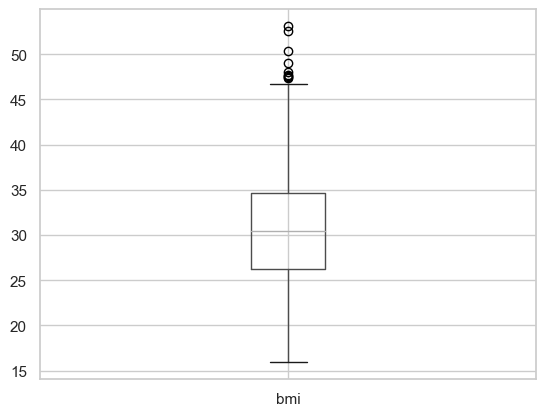

In [13]:
# Check is there any outliers in the bmi.
data.boxplot(column=["bmi"]);
     


It is observed that there are outliers in the bmi feature

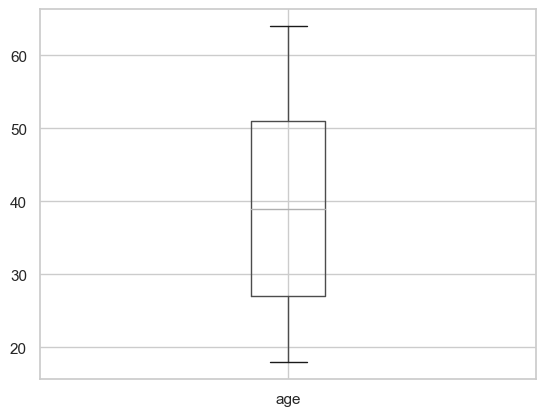

In [14]:
# Check is there any outliers in the age.
data.boxplot(column=["age"]);
     

It is observed that there is no outlier in the age feature.
     

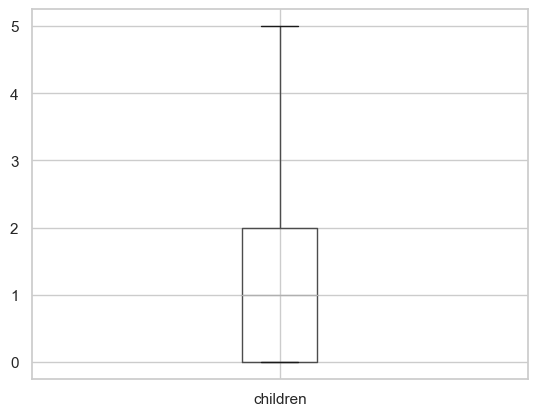

In [15]:
# Check is there any outliers in the children.
data.boxplot(column=["children"]);

 It is observed that there is no outlier in the children feature.

**Removing Of Outliers**

In [16]:
# Define Q1 and Q3 by using 25% and 75% Quantiles.
Q1 = data["bmi"].quantile(0.25)
Q3 = data["bmi"].quantile(0.75)
# Define IQR as the difference of Q3 and Q1.
IQR = Q3 - Q1
# Define Lower Boundary and Upper Boundary.
lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR
     

In [17]:
# In order to find the index of outliers, define a list.
# This list contains row numbers of outliers.
outliers_list = data.index[ (data["bmi"] < lower_boundary) | (data["bmi"] > upper_boundary) ]
# Create an empty list that stores indices of outliers.
outliers_index = []
outliers_index.extend(outliers_list)
     

In [18]:
# Indices of outliers
outliers_index

[116, 286, 401, 543, 847, 860, 1047, 1088, 1317]

It is observed that there are 9 outliers in the bmi feature.

In [19]:
# Create a new dataset that is cleaned from rows of outliers.
outliers_index = sorted(set(outliers_index))
data_cleaned = data.drop(outliers_index)

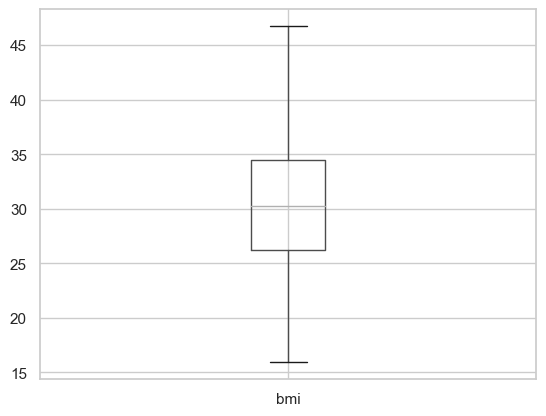

In [20]:
# New dataset has no outliers.
data_cleaned.boxplot(column=["bmi"]);

In [21]:
data_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
# 9 rows belong to outliers are removed from the dataset
data_cleaned.shape

(1329, 7)

In [23]:

# show_corr function that results a barplot.
# Shows correlations from highest to lowest. 
def show_corr(dataset, target_name, n_most=None):
    if n_most is None:
        n_most=len(dataset.columns.values)-1
    corr_matrix=dataset.corr().abs()
    
    most_correlated_features=corr_matrix[target_name].sort_values(ascending=False).drop(target_name)
       
    most_correlated_feature_names=most_correlated_features.index.values
    
    fig, ax=plt.subplots(figsize=(15,5))
    plt.xticks(rotation="90")
    sns.barplot(x=most_correlated_feature_names, y=most_correlated_features)
    plt.title(" Correlation of features with {}".format(target_name))

***
**Correlation Graphs**
***

Correlation Graph Of:

1. Smoker and Charges
2. Smoker and Region
3. BMI and Sex
4. Age and BMI
5. BMI and Children
6. BMI and Charges

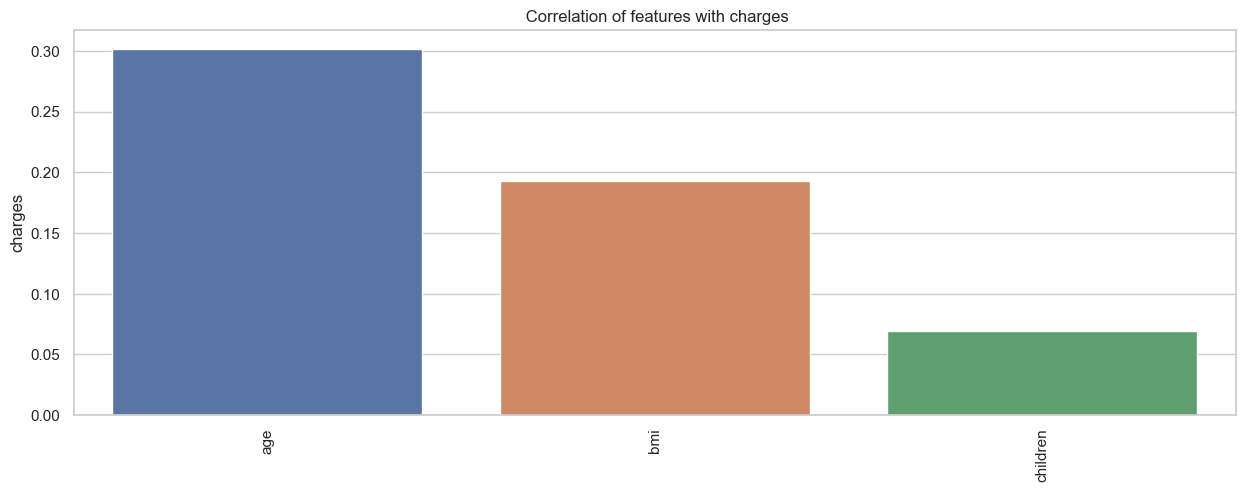

In [24]:
# Correlation of all features when charges feature is target
show_corr(dataset=data_cleaned, target_name='charges')

In [25]:
# New dataset with cleaned from outliers is created as .csv file
data_cleaned.to_csv("insurance_cleaned.csv", index=False)

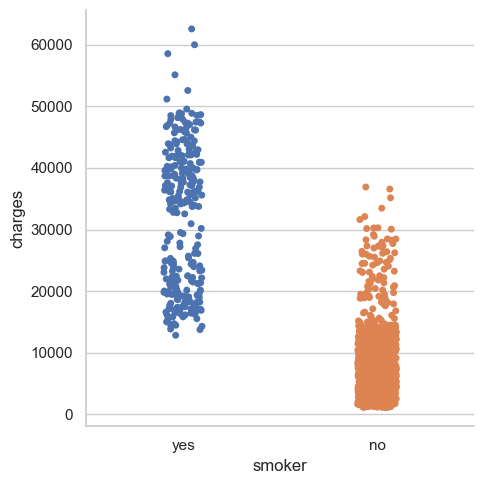

In [26]:
# Correlation between smoker and charges.
corr_smoker_charges = sns.catplot(x="smoker", y="charges", data=data_cleaned)

In [27]:
# Correlation between region and smoker.
corr_region_smoker = data_cleaned.groupby(["region", "smoker"]).size().reset_index(name="Number of People")
corr_region_smoker

,region,smoker,Number of People
0,northeast,no,256
1,northeast,yes,67
2,northwest,no,267
3,northwest,yes,58
4,southeast,no,268
5,southeast,yes,89
6,southwest,no,267
7,southwest,yes,57


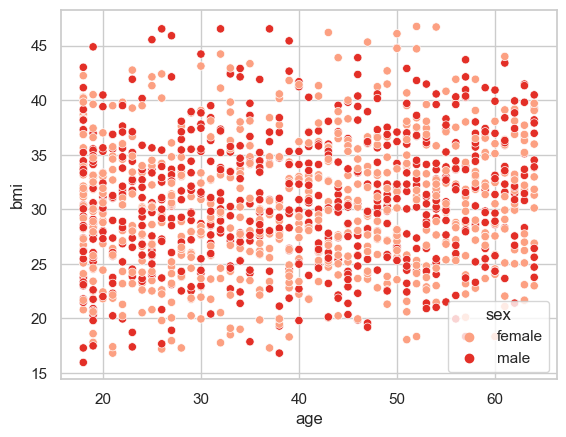

In [58]:

# Correlation between bmi and sex.
corr_bmi_sex = sns.scatterplot(x="age", y="bmi", hue="sex", data=data_cleaned, palette="Reds")

In [57]:
# Number of childrens for each region.
num_children = data_cleaned.groupby("region")["children"].sum()
num_children

region
northeast    337
northwest    373
southeast    378
southwest    369
Name: children, dtype: int64

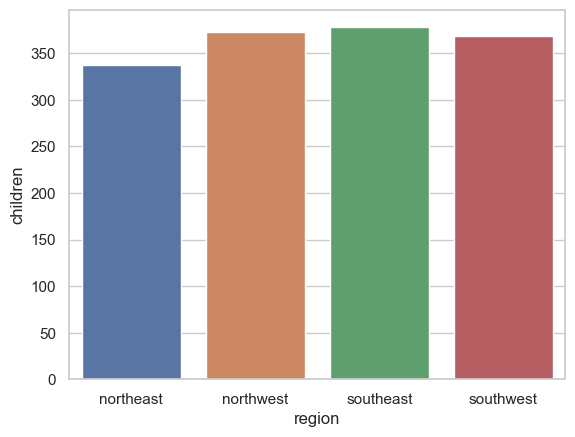

In [31]:
# Create a bar plot that shows the number of childrens with respect to regions
num_children_bar = sns.barplot(x = num_children.index, y = num_children)

**Southeast** is the region with the most children.

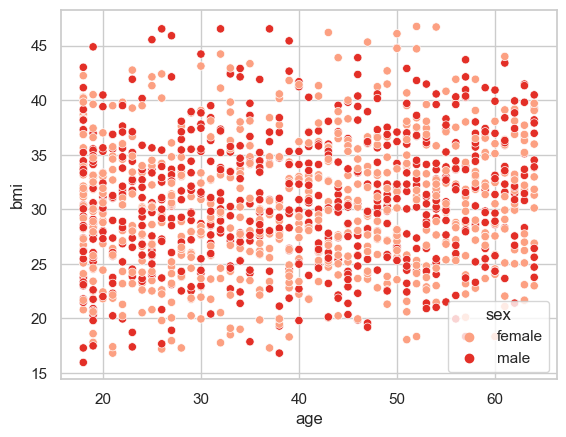

In [61]:
# Correlation between age and bmi.
corr_age_bmi = sns.scatterplot(x="age", y="bmi",hue='sex', data=data_cleaned,palette="Reds")

In [33]:

# Correlation between bmi and children.
corr_bmi_children = data_cleaned.groupby(["children"])["bmi"].describe()
corr_bmi_children

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,571.0,30.448809,5.887124,15.960,26.12500,30.3000,34.550,46.20
1,320.0,30.386500,5.752371,16.815,26.55250,29.9225,34.200,46.53
2,238.0,30.836450,6.349372,16.815,25.75875,31.4500,35.275,46.70
3,157.0,30.684331,5.787173,18.905,27.26500,30.4950,34.320,46.53
4,25.0,31.391200,4.627211,24.415,28.21500,29.6400,33.660,41.47
5,18.0,29.605000,7.139686,18.300,24.30250,28.5500,33.055,46.75


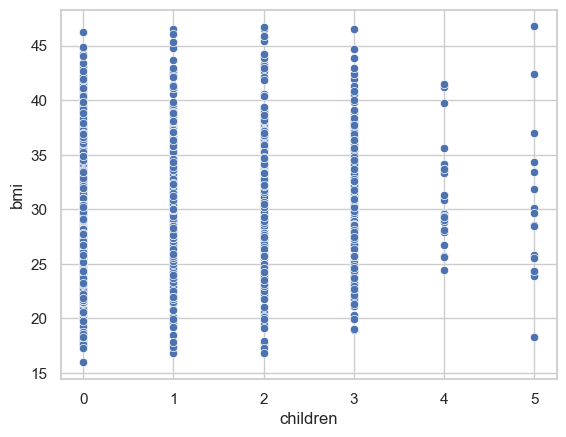

In [63]:
# Line plot of bmi vs children.
line_bmi_children = sns.scatterplot(x="children", y="bmi", data=data_cleaned)

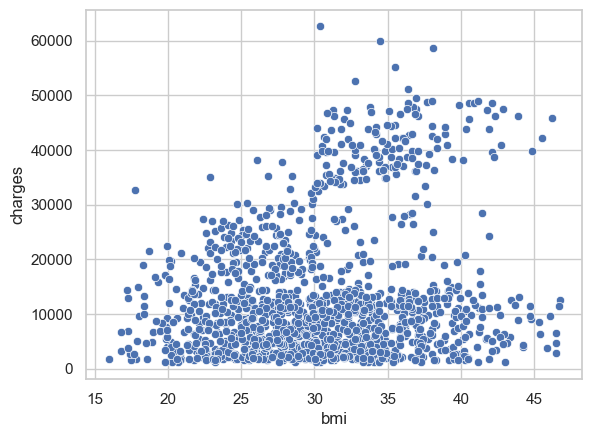

In [35]:
# Correlation between bmi and charges.
corr_bmi_charges = sns.scatterplot(x="bmi", y="charges" ,data=data_cleaned)
     

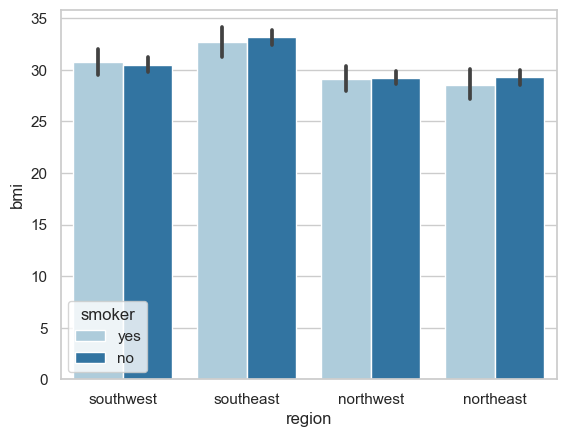

In [36]:
# Correlation between region, smoker and bmi.
corr_region_smoker_bmi = sns.barplot(x="region", y="bmi", hue="smoker", data=data_cleaned, palette="Paired")

<AxesSubplot:>

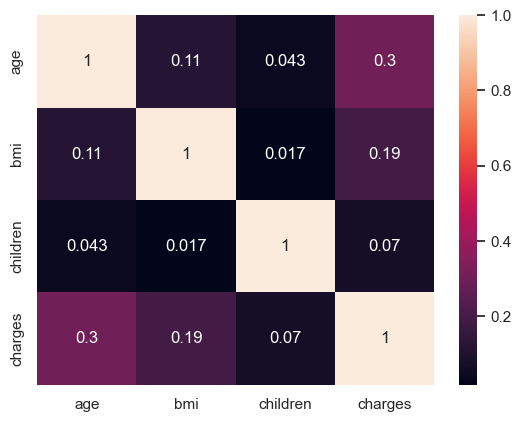

In [37]:
sns.heatmap(data_cleaned.corr(), annot = True)

In [38]:
# One-Hot Encoding via using get_dummies.
data_encoded = pd.get_dummies(data_cleaned, columns = ["sex", "smoker", "region"])
data_encoded.head()
     

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [39]:
data_encoded.corr()
data_cleaned.corr()

,age,bmi,children,charges
age,1.000000,0.114686,0.043041,0.302022
bmi,0.114686,1.000000,0.017355,0.193196
children,0.043041,0.017355,1.000000,0.069739
charges,0.302022,0.193196,0.069739,1.000000


**Train and Test Data**

* To create train and test data, train_test_split method is used.

* 70-30 ratio is used. In other words, the training dataset has 70% of the dataset and the test dataset has the 30% of the dataset

In [40]:
X = data_encoded.drop("charges", axis=1)
y = data_encoded.loc[:, "charges"]

# Split the dataset into train and test sets with 70-30 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3)

In [41]:
# Convert y_train and y_test to pandas DataFrame.
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [43]:
# Check all of the data are pandas DataFrame.
print(f"X_train type: {type(X_train)}\nX_test type: {type(X_test)}\ny_train type: {type(y_train)}\ny_test type: {type(y_test)}")

X_train type: <class 'pandas.core.frame.DataFrame'>
X_test type: <class 'pandas.core.frame.DataFrame'>
y_train type: <class 'pandas.core.frame.DataFrame'>
y_test type: <class 'pandas.core.frame.DataFrame'>


**Scaling the Dataset**

* Data points can be far away from each other.
* Scaling is used to make data points closer to each other.
* Data points become more generalized by being closer.

In [44]:
# Scale dataset to normalize.
scaler_func = MinMaxScaler()
data_list = ["X_train", "X_test", "y_train", "y_test"]
data_list_index = 0
for index in [X_train, X_test, y_train, y_test]:
  scaler_func.fit_transform(index)
  print(f"Min {data_list[data_list_index]}:", scaler_func.data_min_)
  print(f"Max {data_list[data_list_index]}:",scaler_func.data_max_)
  data_list_index += 1
     

Min X_train: [18.   15.96  0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
Max X_train: [64.   46.75  5.    1.    1.    1.    1.    1.    1.    1.    1.  ]
Min X_test: [18.    16.815  0.     0.     0.     0.     0.     0.     0.     0.
  0.   ]
Max X_test: [64.   46.53  5.    1.    1.    1.    1.    1.    1.    1.    1.  ]
Min y_train: [1121.8739]
Max y_train: [55135.40209]
Min y_test: [1131.5066]
Max y_test: [62592.87309]


**Model Selection and Performance Comparison**

The regression models used in the Medical Cost Analysis Project:

1. Linear Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. Ada Boost Regressor
* Several regression models were selected and trained on the preprocessed data.

* The performances of the chosen models were examined using cross-validation.

* The best performing model is selected

* Hyper-parameters are optimized

* By the Grid Search method, parameters are optimized

* The optimized model was evaluated using the regression model evaluation metrics. (e.g., Mean Squared Error, Mean Absolute Error, etc.)

In [45]:

# Create an object using the LinearRegression() class.
linear_regression_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(max_depth = 3)
random_forest_model = RandomForestRegressor(max_depth = 4, n_estimators=500)
gradient_boosting_model = GradientBoostingRegressor(max_depth=3, n_estimators=100, learning_rate =.2)
ada_boost_regressor_model = AdaBoostRegressor(n_estimators=50, learning_rate =.01)
     


In [46]:

# Create a list that contains the regression models.
regression_models = [("Linear Regression", linear_regression_model),
                     ("Decision Tree", decision_tree_model),
                     ("Random Forest", random_forest_model),
                     ("Gradien Boosting", gradient_boosting_model),
                     ("Ada Boost Regressor", ada_boost_regressor_model)]

In [47]:
# Create a list that contains r2 scores of the models.
r2_scores = []

In [49]:
# Create a for loop to check cross validation scores of the regression models.
for regression_name, regression_model in regression_models:
    cross_validation_scores = cross_val_score(regression_model, X_train, y_train.values.ravel(), scoring="r2")
    r2_scores.append(cross_validation_scores.mean()*100)

    print(f"r2 score of {regression_name}: ", str(round(sum(cross_validation_scores)/5*100,4)), "%\n")

r2 score of Linear Regression:  75.4686 %

r2 score of Decision Tree:  85.5622 %

r2 score of Random Forest:  86.7116 %

r2 score of Gradien Boosting:  84.7887 %

r2 score of Ada Boost Regressor:  86.2533 %



Best performing model: **Random Forest**

***
**Hyper-parameter Optimization**
***

In [50]:
# Create a new Random Forest model.

best_model_rand_forest = RandomForestRegressor()

rand_forest_parameters = [{"max_depth": [2, 3, 4, 5, 6],
                           "n_estimators": [400, 500, 600]}]  

rand_forest_gridCV = GridSearchCV(best_model_rand_forest, 
                                  rand_forest_parameters,
                                  cv = 5,
                                  n_jobs = -1)
# Train the model
rand_forest_gridCV.fit(X_train, y_train.values.ravel())
# Get the best parameters for Random Forest Regressor
print(rand_forest_gridCV.best_params_)
print(rand_forest_gridCV.best_score_)

{'max_depth': 4, 'n_estimators': 600}
0.8675678598298194


**Results of Hyper-Parameter Optimization**

The best parameters of Random Forest Regressor:

* max_depth: 4
* n_estimators: 600

The best score of the Random Forest Regressor:

* 0.8571429781029064

***
**Evaluation of the Model**
***

* Root Mean Squared Error (RMSE)
* Root Mean Absolute Error (RMAE)
* r2 Score

Evaluate these results by using the best parameters found by using Hyper-Parameter Optimization

In [51]:
RMSE = cross_val_score( RandomForestRegressor(max_depth = 4, n_estimators = 600), X_train, y_train.values.ravel() ,cv=5, scoring = "neg_mean_squared_error")
print("Mean Squared Error of XGBoost:", (RMSE, 3))

RMAE = cross_val_score( RandomForestRegressor(max_depth = 4, n_estimators = 600), X_train, y_train.values.ravel() ,cv=5, scoring = "neg_mean_absolute_error")
print("Mean Absolute Error of XGBoost:", (RMAE, 3))

r2 = cross_val_score( RandomForestRegressor(max_depth = 4, n_estimators = 600), X_train, y_train.values.ravel() ,cv=5, scoring = "r2").mean()
print("r2 Score of XGBoost:",str(round(r2*100,4))+"%\n")

Mean Squared Error of XGBoost: (array([-17884005.02154469, -19901426.3956625 , -22895280.36092638,
       -22968600.57312782, -11139060.84380466]), 3)
Mean Absolute Error of XGBoost: (array([-2258.87773119, -2502.55138463, -2549.76103779, -2620.93463707,
       -1962.85093814]), 3)
r2 Score of XGBoost: 86.7489%

